In [172]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [173]:
iris = datasets.load_iris()

In [174]:
target = []
for num in iris.target:
    if num == 0:
        num = iris.target_names[0]
    elif num == 1:
        num = iris.target_names[1]
    else:
        num = iris.target_names[2]
    target.append(num) 

## Create Dataframe

In [175]:
data = {}
count = 0
for feature in iris.feature_names:
    data[feature] = [d for d in iris.data[:, count]]
    count += 1
data['target'] = target
df = pd.DataFrame(data)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Visualize initial clusters

Text(0, 0.5, 'Sepal Width')

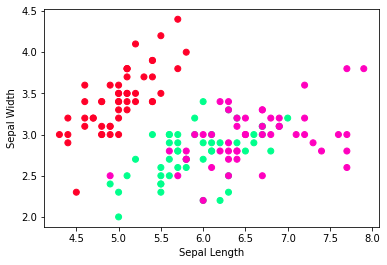

In [176]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=iris.target, cmap='gist_rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

## Build K-Means clusters

In [177]:
km = KMeans(n_clusters = 3, random_state = 21)
km.fit(df.iloc[:, [0, 1]])

KMeans(n_clusters=3, random_state=21)

## Explore K-Means clusters

In [112]:
km.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

## Compare original clusters and K-mean clusters

In [136]:
import numpy as np
# Change km.labels_ 0 to 2, 1 to 0, and 2 to 0
relabel = np.choose(km.labels_, [1,0,2]).astype(np.int64)
print("Ori Iris Label: ", iris.target)
print("Ori K-mean Label: ", new_labels)
print("Encoded K-mean Label: ", relabel)

Ori Iris Label:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Ori K-mean Label:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Encoded K-mean Label:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5, 1.0, 'K-Means')

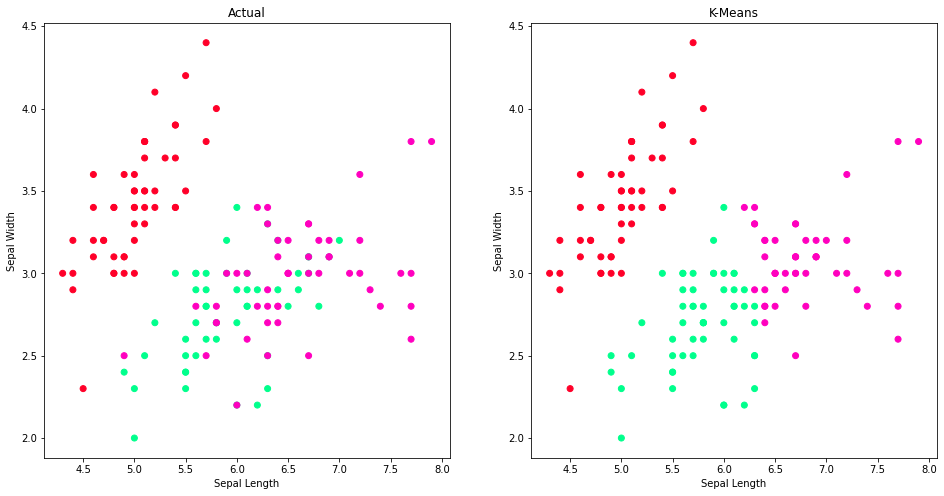

In [141]:
new_labels = km.labels_

# Plot comparison between original cluster and k-means clusters
fig, axes = plt.subplots(1, 2, figsize = (16,8))
axes[0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=iris.target, cmap='gist_rainbow')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[0].set_title('Actual')
axes[1].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=relabel, cmap='gist_rainbow')
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')
axes[1].set_title('K-Means')

## Build K-Means Clusters using all variables

In [166]:
new_df = df.set_index('target')
new_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
setosa,4.6,3.4,1.4,0.3
setosa,5.0,3.4,1.5,0.2
setosa,4.4,2.9,1.4,0.2


In [167]:
km = KMeans(n_clusters = 3, random_state = 21)
km.fit(new_df)

KMeans(n_clusters=3, random_state=21)

Only feed variables that we want to consider (can be unlimited variables) into the K-mean algorithms (can feed entire dataframe as long as it contains just variables, it's fine if the dataframe has label/target as index).

However, when plotting, we can only visualize on 2D/3D plot depending on which variables we choose. But it doesn't matter even if the plot looks different as the clusters are the same anyway. Also it doesn't matter which variables lie on x- or y-axis.

In [168]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0.5, 1.0, 'K-Means')

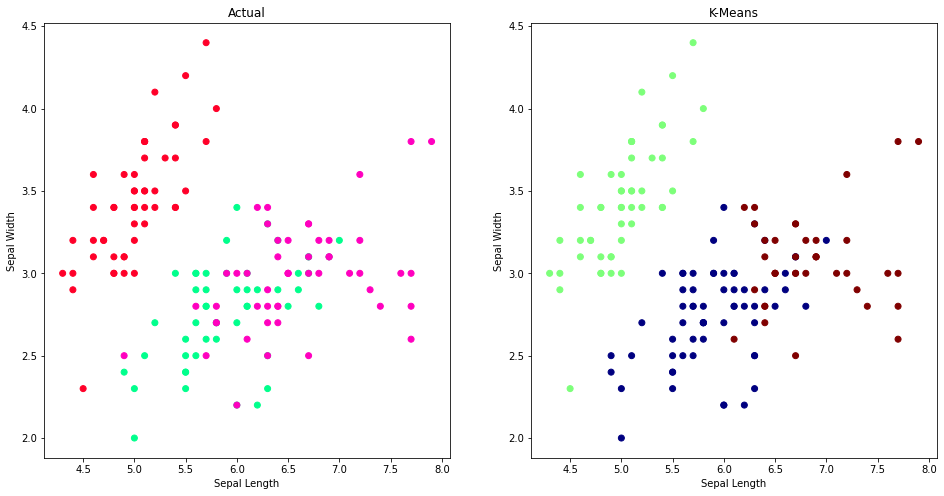

In [169]:
second_labels = km.labels_

# Plot comparison between original cluster and k-means clusters
fig, axes = plt.subplots(1, 2, figsize = (16,8))
axes[0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=iris.target, cmap='gist_rainbow')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[0].set_title('Actual')
axes[1].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=second_labels, cmap='jet')
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')
axes[1].set_title('K-Means')

In [195]:
d = {}
count = 0
for feature in iris.feature_names:
    if count <= 1:
        d[feature] = [i for i in iris.data[:, count]]
        count += 1
    else:
        break

In [197]:
test = pd.DataFrame(d)
test.head(10)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [202]:
km = KMeans(n_clusters = 3, random_state = 21)
pred = km.fit_predict(test)
repred = np.choose(pred, [1,0,2]).astype(np.int64)

Text(0, 0.5, 'Sepal Width')

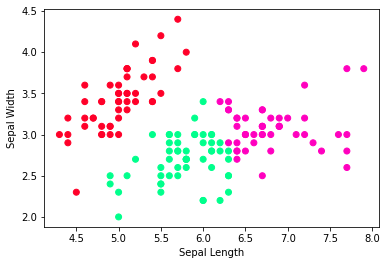

In [203]:
plt.scatter(test['sepal length (cm)'], test['sepal width (cm)'], c=repred, cmap='gist_rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

K-mean clustering does not need "label" actually since it is unsupervised learning, as demonstrated above, when we feed the sepal length and width K-mean is able to cluster the data based on the given information. The only reason we plot both original and K-mean cluster is to visualize how good is K-mean clustering in identifying the correct cluster.